ЗАДАЧА КЛАССИФИКАЦИИ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('titanik/train.csv', index_col='PassengerId')
# test_df = pd.read_csv('titanik/test.csv', index_col='PassengerId')
# combine = [train_df, test_df]

In [3]:
#Атрибуты таблицы
print(train_df.columns.values)

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [5]:
#Пример данных
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df['Pclass'].corr(train_df['Fare'])

-0.5494996199439081

In [7]:
dataset = train_df[['Survived', 'Fare', 'Sex', 'Age', 'Parch', 'SibSp', 'Pclass' ]]
dataset = dataset.dropna()
dataset.head()

,Survived,Fare,Sex,Age,Parch,SibSp,Pclass
PassengerId,,,,,,,
1,0,7.2500,male,22.0,0,1,3
2,1,71.2833,female,38.0,0,1,1
3,1,7.9250,female,26.0,0,0,3
4,1,53.1000,female,35.0,0,1,1
5,0,8.0500,male,35.0,0,0,3


In [8]:
dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
dataset['Bias'] = 1
dataset.head()

,Survived,Fare,Sex,Age,Parch,SibSp,Pclass,Bias
PassengerId,,,,,,,,
1,0,7.2500,1,22.0,0,1,3,1
2,1,71.2833,0,38.0,0,1,1,1
3,1,7.9250,0,26.0,0,0,3,1
4,1,53.1000,0,35.0,0,1,1,1
5,0,8.0500,1,35.0,0,0,3,1


$y(x) = kx+b = <(k||b), (x||1)> = k*x + b*1$

In [9]:
x = dataset[['Sex', 'Age', 'Pclass', 'Bias' ]].values
y = dataset['Survived'].values
x[:5], y[:5]

(array([[ 1., 22.,  3.,  1.],
        [ 0., 38.,  1.,  1.],
        [ 0., 26.,  3.,  1.],
        [ 0., 35.,  1.,  1.],
        [ 1., 35.,  3.,  1.]]),
 array([0, 1, 1, 1, 0]))

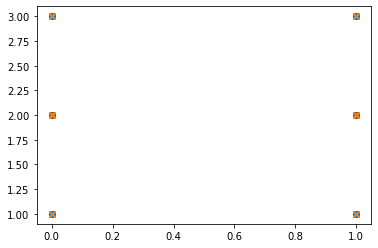

In [10]:
plt.plot(x[y==0][:,0], x[y==0][:,2], 'o')
plt.plot(x[y==1][:,0], x[y==1][:,2], 'x')
# plt.axis('equal')

# plt.plot(dissect_line, line(dissect_line))
plt.show()

Гипотеза линейной регрессии: $z_\theta(x) = \theta_0x_0 + \theta_1x_1 \dots + \theta_nx_n = \theta^T(1||x)$

In [60]:
def z(theta, x):
    return x @ theta.T

In [61]:
init_theta =  np.array([0.01,0.01, 0.01, 0.01])
z(init_theta, x)[:5]

array([0.27, 0.4 , 0.3 , 0.37, 0.4 ])

Cигмоид-функция:
$$y(z) = \frac{1}{1 + e^{-z}}$$

In [62]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

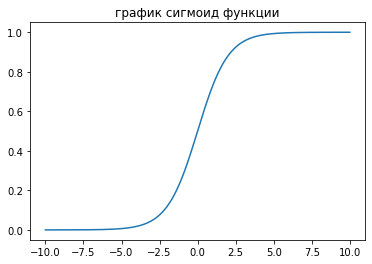

In [63]:
x_axis = np.linspace(-10,10, 10**4)
y_axis = sigmoid(x_axis)
plt.plot(x_axis, y_axis)
plt.title("график сигмоид функции")
plt.show()

Логистическая регрессия использует комбинацию сигмоид-функции и линейной регрессис:
$$h_\theta(x) = \frac{1}{1 + e^{-z_\theta(x)}} = \frac{1}{1 + e^{-\theta^Tx}}$$

In [64]:
def hypothesis(theta, x):
    return sigmoid(z(theta, x))

In [65]:
hypothesis(init_theta, x)[:5]

array([0.5670929 , 0.59868766, 0.57444252, 0.59145898, 0.59868766])

Логистическая регрессия дает нам верояность $н$ равной $1$ для данного $\theta$.
$$h_\theta(x) = P(y = 1 \,|\, x ; \theta) = 1 - P(y = 0 \,|\, x ; \theta)$$

ЗАДАЧА: найти такое значение $\theta$, чтобы гипотеза давала нам наиболее точное предсказание для набора данных $(x_i, y_i)$ 
$$ \theta* = \text{argmin}_{\theta}\sum{-y_i\text{log}h_\theta(x_i)-(1-y_i)\text{log}(1-h_\theta(x_i))} $$

In [66]:
def loss_function(theta, x, y):
    h = hypothesis(theta, x)
    loss = -y * np.log(h) - (1 - y) * np.log(1 - h)
    loss_mean = np.mean(loss)
    return loss_mean

In [67]:
loss_function(init_theta, x, y)

0.7493966650933906

In [68]:
def gradient_descent(init_theta, x, y, learning_rate, iterations, save_frequency):
    loss_history = []
    theta = init_theta
    for i in range(iterations):
        if i%save_frequency==0:
            loss_history.append(loss_function(theta, x, y))
        gradient = 1/len(x) * (hypothesis(theta, x) - y) @ x
        theta = theta - learning_rate * gradient
    return (loss_history, theta)

In [71]:
loss_history, theta = gradient_descent(init_theta, x, y, 
                                       learning_rate=0.001, iterations=5*10**5, save_frequency=10**2)

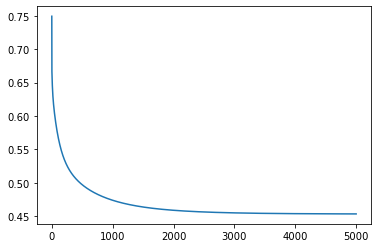

In [72]:
plt.plot(loss_history)
plt.show()

In [73]:
print(dataset.columns[1:])
print(theta)

Index(['Fare', 'Sex', 'Age', 'Parch', 'SibSp', 'Pclass', 'Bias'], dtype='object')
[-2.471274   -0.03400308 -1.22342944  4.78986516]


In [74]:
hypothesis(x,theta)[:5], y[:5]

(array([0.10911966, 0.90672766, 0.55860358, 0.91500428, 0.07297896]),
 array([0, 1, 1, 1, 0]))

In [75]:
y_predict = np.rint(hypothesis(x,theta))
y_predict[:5]

array([0., 1., 1., 1., 0.])

In [76]:
(y==y_predict).mean()

0.7899159663865546

In [78]:
passenger = {'Sex':0, 'Age':22, 'Pclass':1, 'Bias':1 }
x_test = np.array([passenger[k] for k in passenger])
hypothesis(x_test, theta)

0.9436603573276203

In [ ]:
# min_values = np.min(x, axis=0)
# max_values = np.max(x, axis=0)

# line = lambda x: x * -parameters[0]/parameters[1] + bias
# dissect_line = np.linspace(start=min_values[0], stop=max_values[0],num=10**4)

plt.plot(x[y==0][:,0], x[y==0][:,2], 'o')
plt.plot(x[y==1][:,0], x[y==1][:,2], 'x')
plt.axis('equal')

# plt.plot(dissect_line, line(dissect_line))
plt.show()